<h1><center>Machine Learning</center></h1>
<h2><center>A Bird's Eye View of the (Random) Forest</center></h2>
<p><center>Rehan S. Durrani<sup>&#8224;</sup></center></p>
<sup>&#8224;</sup> University of California, Berkeley

## What is Machine Learning
Machine Learning is the process of predicting answers to questions, given previous examples. A lot of machine learning boils down to math techniques rooted in multivariate calculus and linear algebra, such as gradient descent, a technique fundamental to today's research in neural nets, which we shall discuss shortly.

The machine learning lifecycle starts by posing a question - for example, is it possible to predict tommorow's weather, given todays. Next is data gathering and cleaning - the researcher may contact the local weather station and ask for the weather records for the previous few years, after which they clean it - perhaps by removing outliers or corrupted data points. The researcher then decides what kind of model to use, and then comes up with an objective function - a function that takes in the model's prediction, as well as the ground truth, and returns a measure of the model's accuracy or predictive ability. After, the researcher usually performs optimization on the objective function, via a technique such as gradient descent. Gradient descent entails taking the gradient (the higher dimensional abstraction of the derivative) of the objective function, and "hill-climbing" - using the gradient as an indication of the direction that we should shift the input to decrease the value of the objective function.

## Neural Nets
As we have shown, being able to take the gradient of our objective is critical to machine learning; however, the objective function can often be messy and hard to differentiate. This is where Neural Nets enter the field. Neural Nets are a graphical way to represent the composition of functions. By composing simpler functions that we know how to differentiate, we can apply multivariate chain rule and more easily differentiate our objective function with respect to our inputs. 

Below is an example neural net:

![Example Neural Net](nn_ex.png)

In the forward pass, we compute $\textrm{Objective} = f(g(x))$. In the backward pass, we compute the gradient of the objective with respect to the input - 

$$\frac{\partial \textrm{Objective}}{\partial x} = \frac{\partial f}{\partial g}\frac{\partial g}{\partial x}$$

## Residual Neural Nets
Something you may notice is that in the backwards pass, we multiply successive gradients together. If our gradients have a magnitude less than 1, then we run into the issue of *vanishing gradients*, where successive multiplication by fractional values causes the gradient to become too small to be useful, especially when using deep neural nets, which are often necessary to model and solve complex problems.

Residual Neural Nets were invented to help alleviate this issue. By adding the input to a node to its output, they ensure that there is an additional $+1$ term when computing the gradient, to make sure that its magnitude is greater than 1. The neural net above, for example, could look like the following, if we added a residual layer:

![Title](rnn_ex.gv.png)

Now, the gradient of the objective with respect to the input is:

$$\frac{\partial \textrm{Objective}}{\partial x} = \left(\frac{\partial f}{\partial g} + \frac{\partial f}{\partial x}\right)\frac{\partial g}{\partial x}$$

We will now see an example of a Residual Net, namely, the ResNet, developed by researchers at google. We will be using a pretrained net with 50 layers, trained and built with the PyTorch framework. Make sure to pass in as input a JPEG file!

In [20]:
import torch
import numpy as np
from torchvision import models, transforms
model = models.resnet50(pretrained=True)
# First we define the preproccessing on the images:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])
import urllib.request, json 
with urllib.request.urlopen("https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json") as url:
    class_idx = json.loads(url.read().decode())
    labels = np.array([class_idx[str(k)][1] for k in range(len(class_idx))])

In [41]:
def predict(img_file_names):
    import torch
    from PIL import Image
    import torch.nn as nn
    
    img_tensors = []
    for img in img_file_names:
        img_tensor = preprocess(Image.open(img))
        img_tensor.unsqueeze_(0)
        img_tensors.append(img_tensor)
    img_batch = torch.cat(img_tensors)
    
    # We perform a forward pass
    with torch.no_grad():
        model_output = model(img_batch)
    
    image_labels = []
    for i in range(len(model_output)):
        out = model_output[i]
        from IPython.display import display
        display(Image.open(img_file_names[i]))
        prob = nn.Softmax()(out).numpy()
        prob = np.squeeze(prob)
        results = out.data.numpy()
        top5 = np.argpartition(results, -5)[-5:]
        top5 = top5[np.argsort(results[top5])]
        print('Labels and Probabilities:', [[labels[i], prob[i]] for i in top5[::-1]])

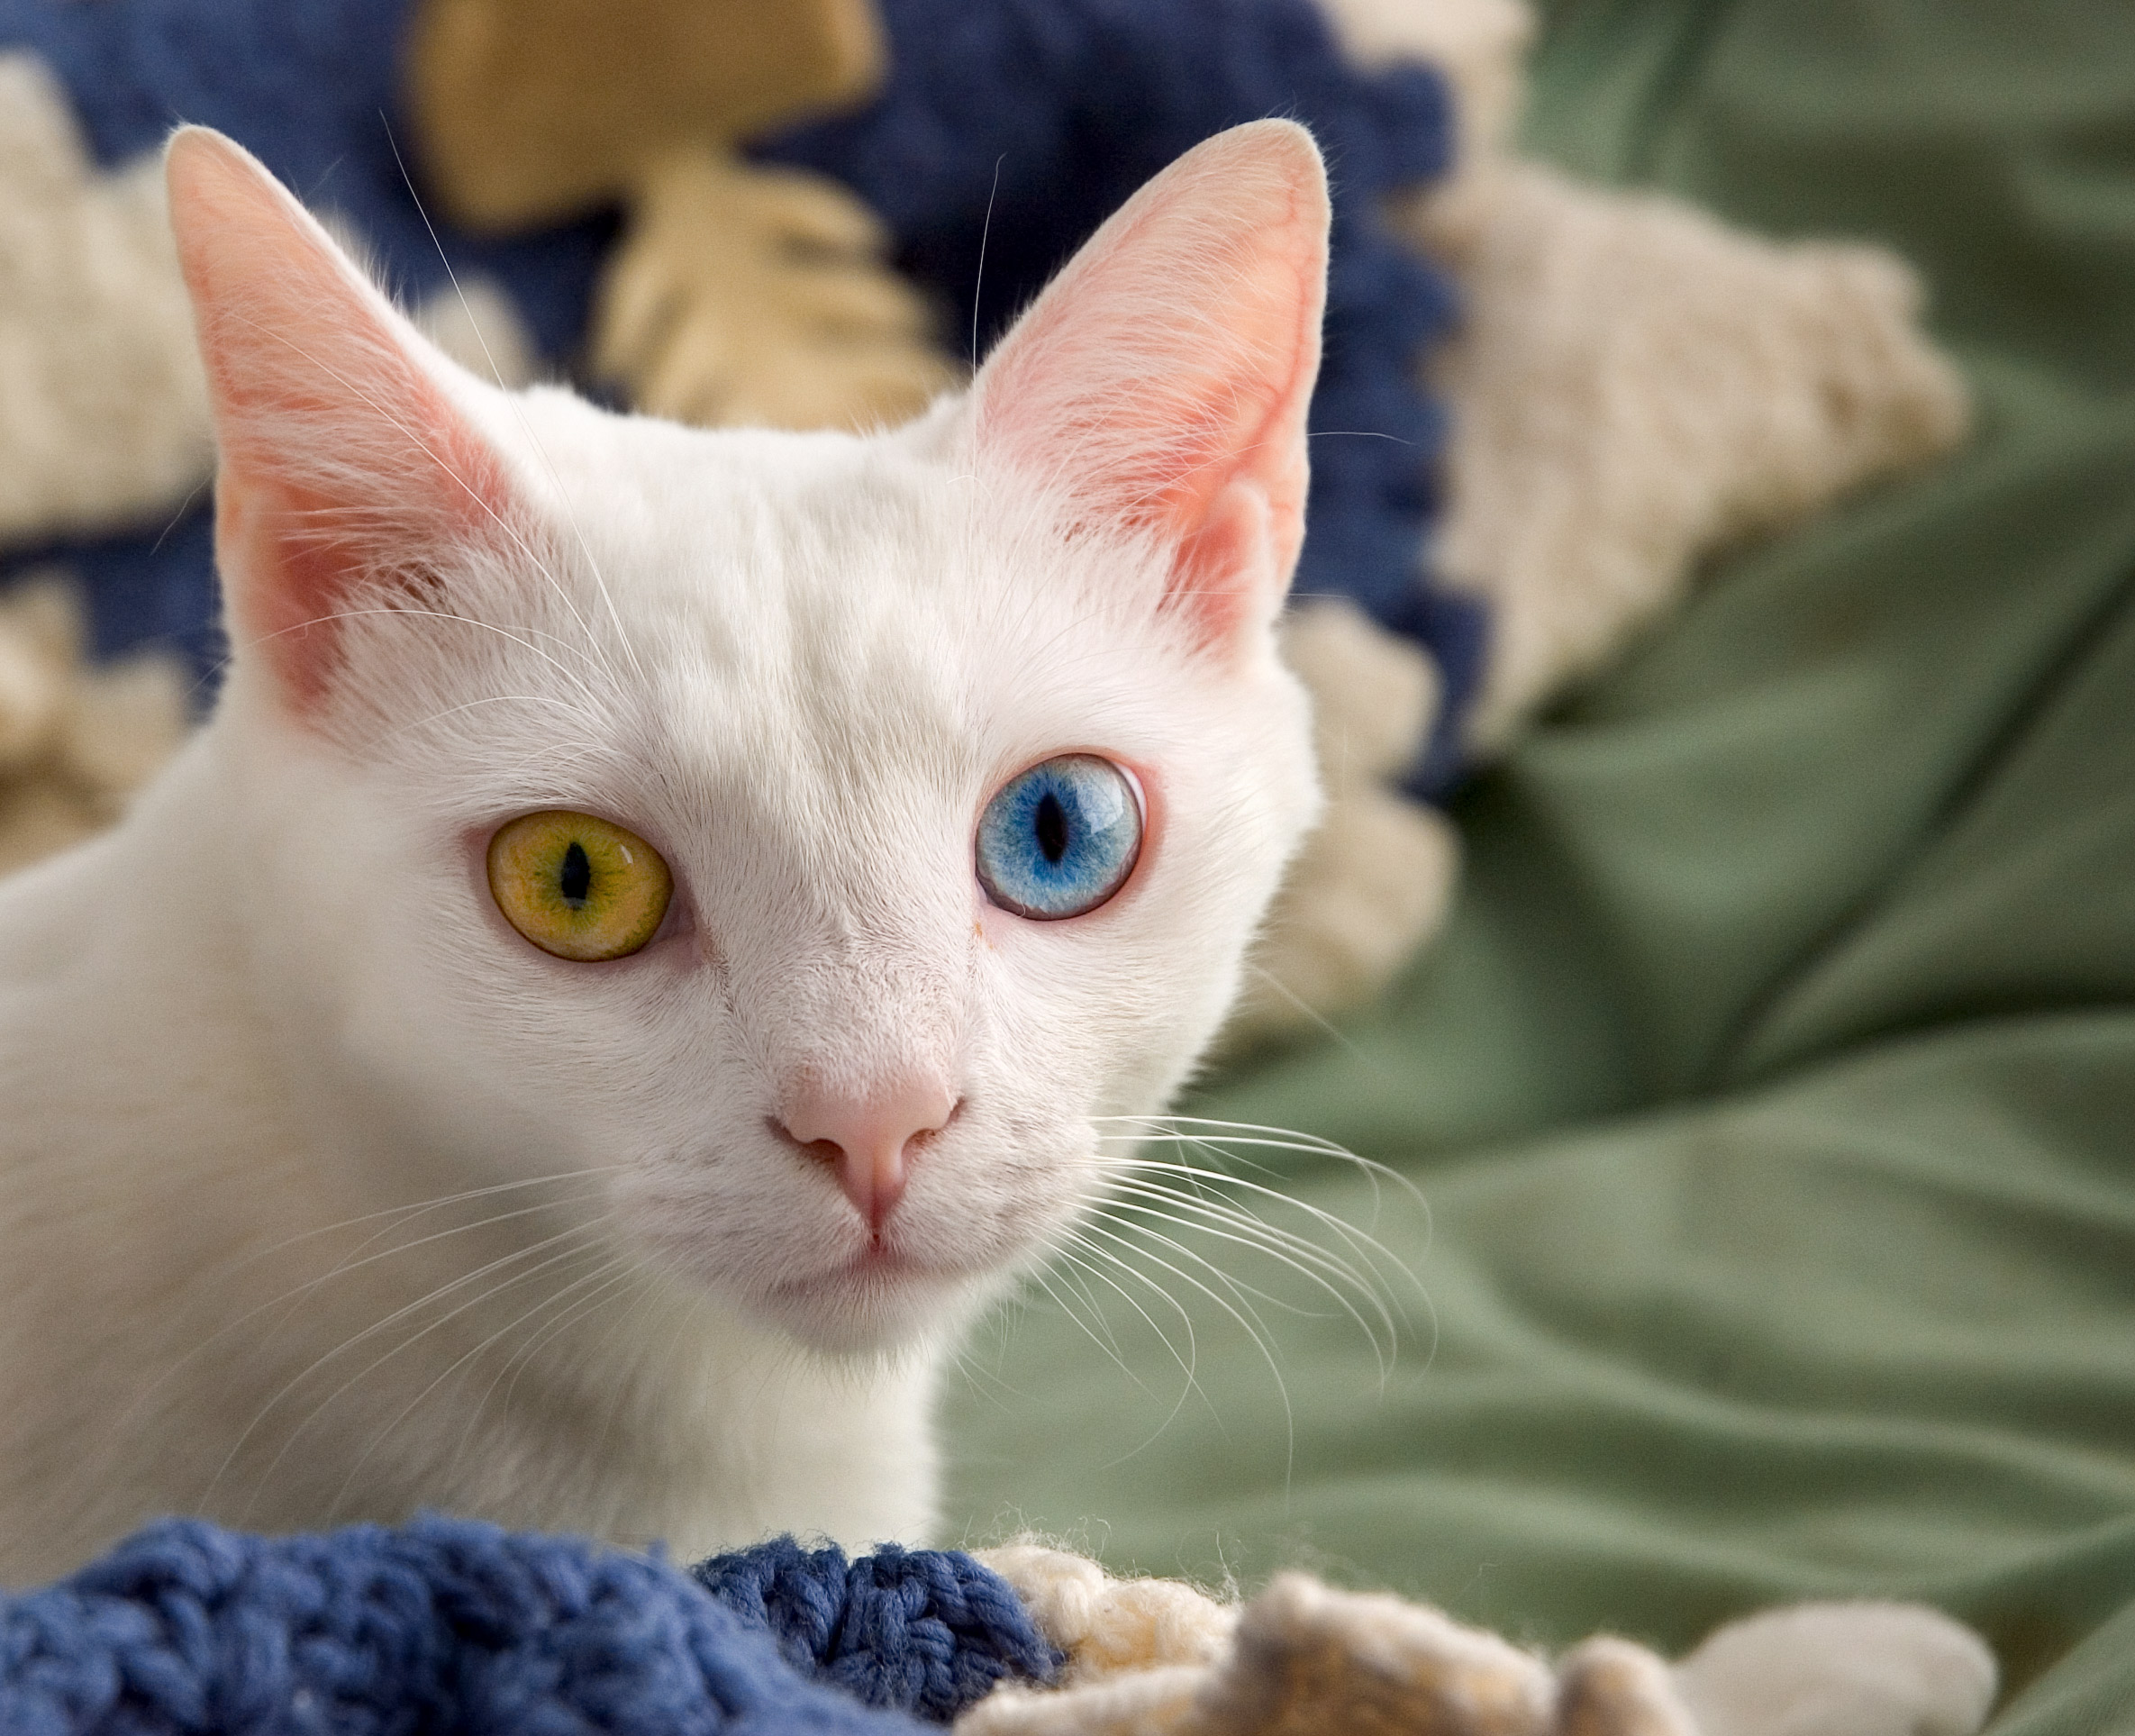

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Labels and Probabilities: [['bucket', 0.0062143393], ['hook', 0.0058753714], ['plunger', 0.005176395], ['tennis_ball', 0.004753586], ['paper_towel', 0.0046359524]]


In [ ]:
predict(['img/June_odd-eyed-cat.jpg', 'img/June_odd-eyed-cat.jpg'])
# Feel free to download and add your own images